In [1]:
import numpy as np
import matplotlib.pyplot as plt

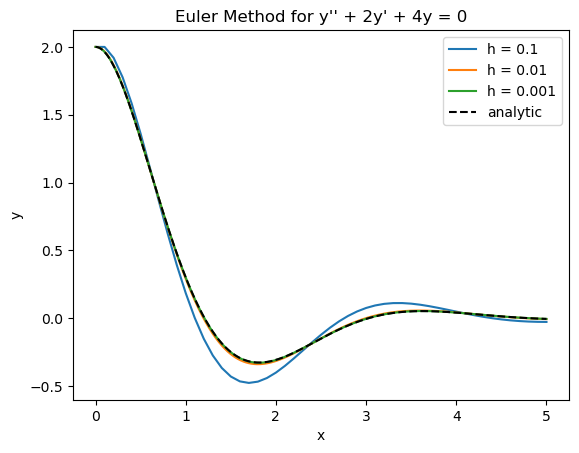

In [2]:
def euler(h):
    x_values = np.arange(0, 5+h, h)

    y1 = 2.0   # y
    y2 = 0.0   # y'

    ys = []  # store y(x)

    for x in x_values:
        ys.append(y1)

        f1 = y2
        f2 = -2*y2 - 4*y1

        y1 = y1 + h * f1
        y2 = y2 + h * f2

    return x_values, np.array(ys)

# analytic solution
def y_exact(x):
    return 2*np.exp(-x)*( np.cos(np.sqrt(3)*x) +
                          (1/np.sqrt(3))*np.sin(np.sqrt(3)*x) )

hs = [0.1, 0.01, 0.001]
plt.figure()

for h in hs:
    x, y = euler(h)
    plt.plot(x, y, label=f"h = {h}")

x = np.linspace(0, 5, 1000)
plt.plot(x, y_exact(x), 'k--', label="analytic")

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Euler Method for y'' + 2y' + 4y = 0")
plt.show()

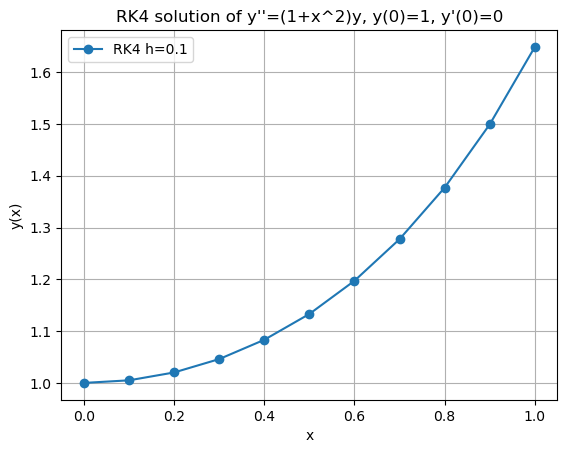

In [3]:
def f(x, y):
    # y = [y1, y2]
    return np.array([ y[1], (1 + x**2) * y[0] ])

def rk4_system(f, x0, y0, x_end, h):
    xs = np.arange(x0, x_end + 1e-12, h)
    ys = np.zeros((len(xs), 2))
    ys[0] = y0.copy()

    for n in range(len(xs)-1):
        x_n = xs[n]
        y_n = ys[n]

        k1 = h * f(x_n, y_n)
        k2 = h * f(x_n + 0.5*h, y_n + 0.5*k1)
        k3 = h * f(x_n + 0.5*h, y_n + 0.5*k2)
        k4 = h * f(x_n + h, y_n + k3)

        ys[n+1] = y_n + (k1 + 2*k2 + 2*k3 + k4) / 6.0

    return xs, ys

# Parameters
x0 = 0.0
x_end = 1.0
h = 0.1
y0 = np.array([1.0, 0.0])

xs, ys = rk4_system(f, x0, y0, x_end, h)
y_vals = ys[:,0]

plt.plot(xs, y_vals, marker='o', label=f'RK4 h={h}')
plt.xlabel('x'); plt.ylabel('y(x)')
plt.title("RK4 solution of y''=(1+x^2)y, y(0)=1, y'(0)=0")
plt.grid(True); plt.legend()
plt.show()

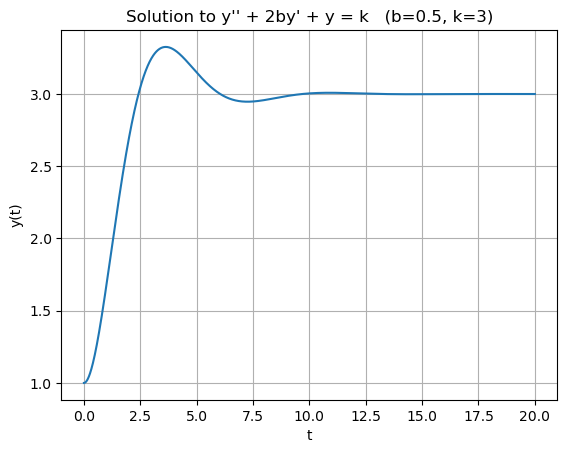

In [4]:
b = 0.5
k = 3.0

# system of first order ODEs
def f(x, y):
    y1, y2 = y
    dy1 = y2
    dy2 = k - y1 - 2*b*y2   # from y'' + 2by' + y = k
    return np.array([dy1, dy2])

# RK4 integrator
def rk4(f, x0, y0, x_end, h):
    xs = np.arange(x0, x_end + 1e-12, h)
    ys = np.zeros((len(xs), 2))
    ys[0] = y0
    for i in range(len(xs)-1):
        x = xs[i]
        y = ys[i]
        k1 = h * f(x, y)
        k2 = h * f(x + 0.5*h, y + 0.5*k1)
        k3 = h * f(x + 0.5*h, y + 0.5*k2)
        k4 = h * f(x + h, y + k3)
        ys[i+1] = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return xs, ys

# initial conditions
x0 = 0
y0 = np.array([1.0, 0.0])   # y(0)=1, y'(0)=0

# solve on range [0, 20]
h = 0.01
xs, ys = rk4(f, x0, y0, 20, h)

y_vals = ys[:,0]  # actual y(t)

# plot
plt.plot(xs, y_vals)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Solution to y'' + 2by' + y = k   (b=0.5, k=3)")
plt.grid(True)
plt.show()

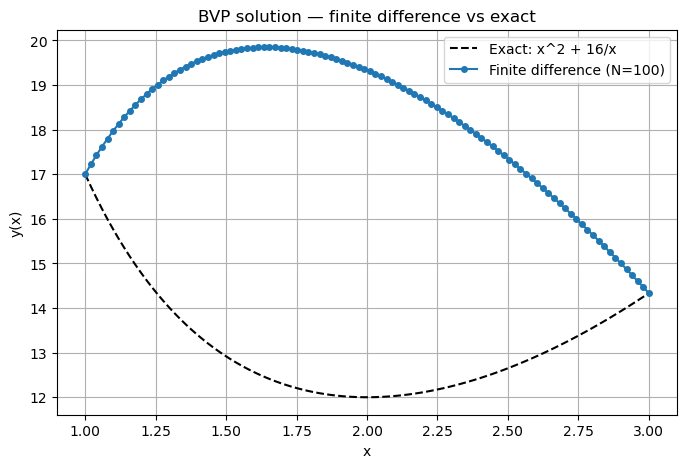

max absolute error = 7.607874363054641


In [5]:
def f(x):
    return 2.0 + 32.0 / x**3

# exact solution for comparison
def y_exact(x):
    return x**2 + 16.0 / x

# domain and boundary conditions
a, b = 1.0, 3.0
y_a = 17.0
y_b = 43.0/3.0


N = 100           
h = (b - a) / (N + 1)

# grid including boundaries
xs = np.linspace(a, b, N + 2)


A = np.zeros((N, N))
rhs = np.zeros(N)

for i in range(N):
    xi = a + (i+1)*h         

    if i > 0:
        A[i, i-1] = -1.0
    A[i, i] = 2.0
    if i < N-1:
        A[i, i+1] = -1.0

    # right-hand side: h^2 * f(x_i), but move boundary contributions
    rhs[i] = (h**2) * f(xi)

# incorporate boundary conditions (y_0 and y_{N+1})
# first interior eqn has + y_0 term on left -> move it to rhs
rhs[0] += y_a
# last interior eqn has + y_{N+1} term on left -> move it to rhs
rhs[-1] += y_b

# solve linear system for interior y-values
y_interior = np.linalg.solve(A, rhs)

# assemble full solution including boundaries
y_num = np.concatenate(([y_a], y_interior, [y_b]))

# exact solution on the same grid
y_ex = y_exact(xs)

# plotting
plt.figure(figsize=(8,5))
plt.plot(xs, y_ex, 'k--', label='Exact: x^2 + 16/x')
plt.plot(xs, y_num, 'o-', label=f'Finite difference (N={N})', markersize=4)
plt.xlabel('x'); plt.ylabel('y(x)')
plt.title('BVP solution — finite difference vs exact')
plt.legend(); plt.grid(True)
plt.show()

# print max error
max_err = np.max(np.abs(y_num - y_ex))
print("max absolute error =", max_err)

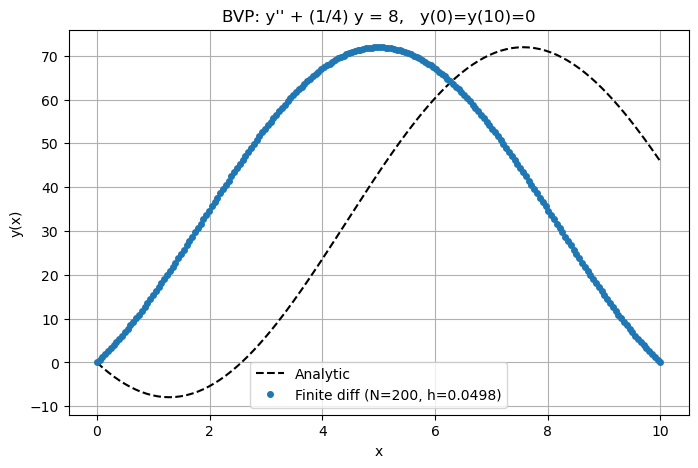

h = 0.049751, max absolute error = 4.781e+01, RMSE = 3.470e+01


In [7]:
def y_analytic(x):
    # constants C1=-32, C2 = 32*(1-cos(5))/sin(5)
    C1 = -32.0
    C2 = 32.0 * (1.0 - np.cos(5.0)) / np.sin(5.0)
    return C1 * np.cos(0.5 * x) + C2 * np.sin(0.5 * x) + 32.0

# finite difference 
def solve_bvp_fd(a=0.0, b=10.0, N=200):
    # N = number of interior points
    h = (b - a) / (N + 1)
    xs = np.linspace(a, b, N + 2)   
    # coefficients for the tridiagonal system
    main_diag = (2.0 - (h**2) / 4.0) * np.ones(N)   
    off_diag = -1.0 * np.ones(N-1)     
    
    rhs = -8.0 * h**2 * np.ones(N)

    A = np.zeros((N, N))
    for i in range(N):
        A[i, i] = main_diag[i]
        if i > 0:
            A[i, i-1] = off_diag[i-1]
        if i < N-1:
            A[i, i+1] = off_diag[i]

    # solve
    y_interior = np.linalg.solve(A, rhs)

    # full solution including boundaries
    y_full = np.concatenate(([0.0], y_interior, [0.0]))

    return xs, y_full, h

# --- run solver and plot ---
xs, y_num, h = solve_bvp_fd(N=200)   # try N=50,100,200 to see convergence
y_ex = y_analytic(xs)

plt.figure(figsize=(8,5))
plt.plot(xs, y_ex, 'k--', label='Analytic')
plt.plot(xs, y_num, 'o', markersize=4, label=f'Finite diff (N=200, h={h:.4f})')
plt.xlabel('x'); plt.ylabel('y(x)')
plt.title("BVP: y'' + (1/4) y = 8,   y(0)=y(10)=0")
plt.legend(); plt.grid(True)
plt.show()

# print errors
max_err = np.max(np.abs(y_num - y_ex))
rmse = np.sqrt(np.mean((y_num - y_ex)**2))
print(f"h = {h:.6f}, max absolute error = {max_err:.3e}, RMSE = {rmse:.3e}")